## Entanglement

In [1]:
%pip install qiskit
%pip install quantum_simulation_recipe
%pip install matplotlib
%pip install numpy

  Using cached rustworkx-0.17.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
  Using cached stevedore-5.6.0-py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 58.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 103.1 MB/s  0:00:00
Using cached rustworkx-0.17.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 104.8 MB/s  0:00:00 eta 0:00:01
Using cached stevedore-5.6.0-py3-none-any.whl (54 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [qiskit]2m5/6 [qiskit]
Note: you may need to restart the kernel to use updated packages.
  Using cached quantum_simulation_recipe-0.4.3-py3-none-any.whl.metadata (2.6 kB)
  Using cached openfermion-1.7.1-py3-none-any.whl.metadata (13 kB)
  Using cached openfermionpyscf-0.5-py3-none-any.whl.metadata (6.9 kB)
  Using cached colorspace-1.0.0.tar.gz (519 kB)
  Installing build dependencies .

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, random_clifford, Pauli, Operator, partial_trace, entropy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from quantum_simulation_recipe.spin import Nearest_Neighbour_1d
from quantum_simulation_recipe.trotter import *
from quantum_simulation_recipe.bounds import norm, tight_bound, commutator
from quantum_simulation_recipe.plot_config import *

def partEntropy(states, m):
    entro = []
    for i, state in enumerate(states):
        st = partial_trace(state, list(range(m)))
        entro.append(entropy(st, 2))
    return entro
    

depth = 40

# Load data for both plots
# Atypical data
s_anti = np.load("./vardata/antientstates.npy")
states_anti = []
for i, st in enumerate(s_anti):
    state = Statevector(st)
    states_anti.append(state)

moments_anti = []
for j, st0 in enumerate(states_anti):
    errors = np.load(f"./vardata/antient_{j}.npy")
    errors = np.power(errors, 2)*np.power(10,8)
    av = np.average(errors)
    errors = errors - av
    moments_anti.append(np.average(np.power(errors, 2)))

# Typical data
s_ent = np.load("./vardata/entstates.npy")
states_ent = []
for i, st in enumerate(s_ent):
    state = Statevector(st)
    states_ent.append(state)

moments_ent = []
for j, st0 in enumerate(states_ent):
    errors = np.load(f"./vardata/ent_{j}.npy")
    errors = np.power(errors, 2)*np.power(10,8)
    av = np.average(errors)
    errors = errors - av
    moments_ent.append(np.average(np.power(errors, 2)))

# Plot settings
fontprops = {'size': 28}
ls = 28
ws = 28
# plt.rc('text', usetex=True)
# plt.rc('font', family='sans-serif')
# plt.rcParams["font.family"] = ["Times New Roman"]

set_fontsize(linewidth=3)


colors = ['#E4A031', '#D68438', '#C76B60', '#B55384', '#7C4D77', '#474769', 
          '#B2B6C1', '#73A5A2', '#4C7780', '#F6E2C1', '#F3DBC1', '#D6E2E2', 
          '#F0EFED', '#E3BBED', '#26445E']
x = list(range(depth + 1))
print(mpl.matplotlib_fname())


/home/xrzhang/anaconda3/envs/qs/lib/python3.12/site-packages/matplotlib/mpl-data/matplotlibrc


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

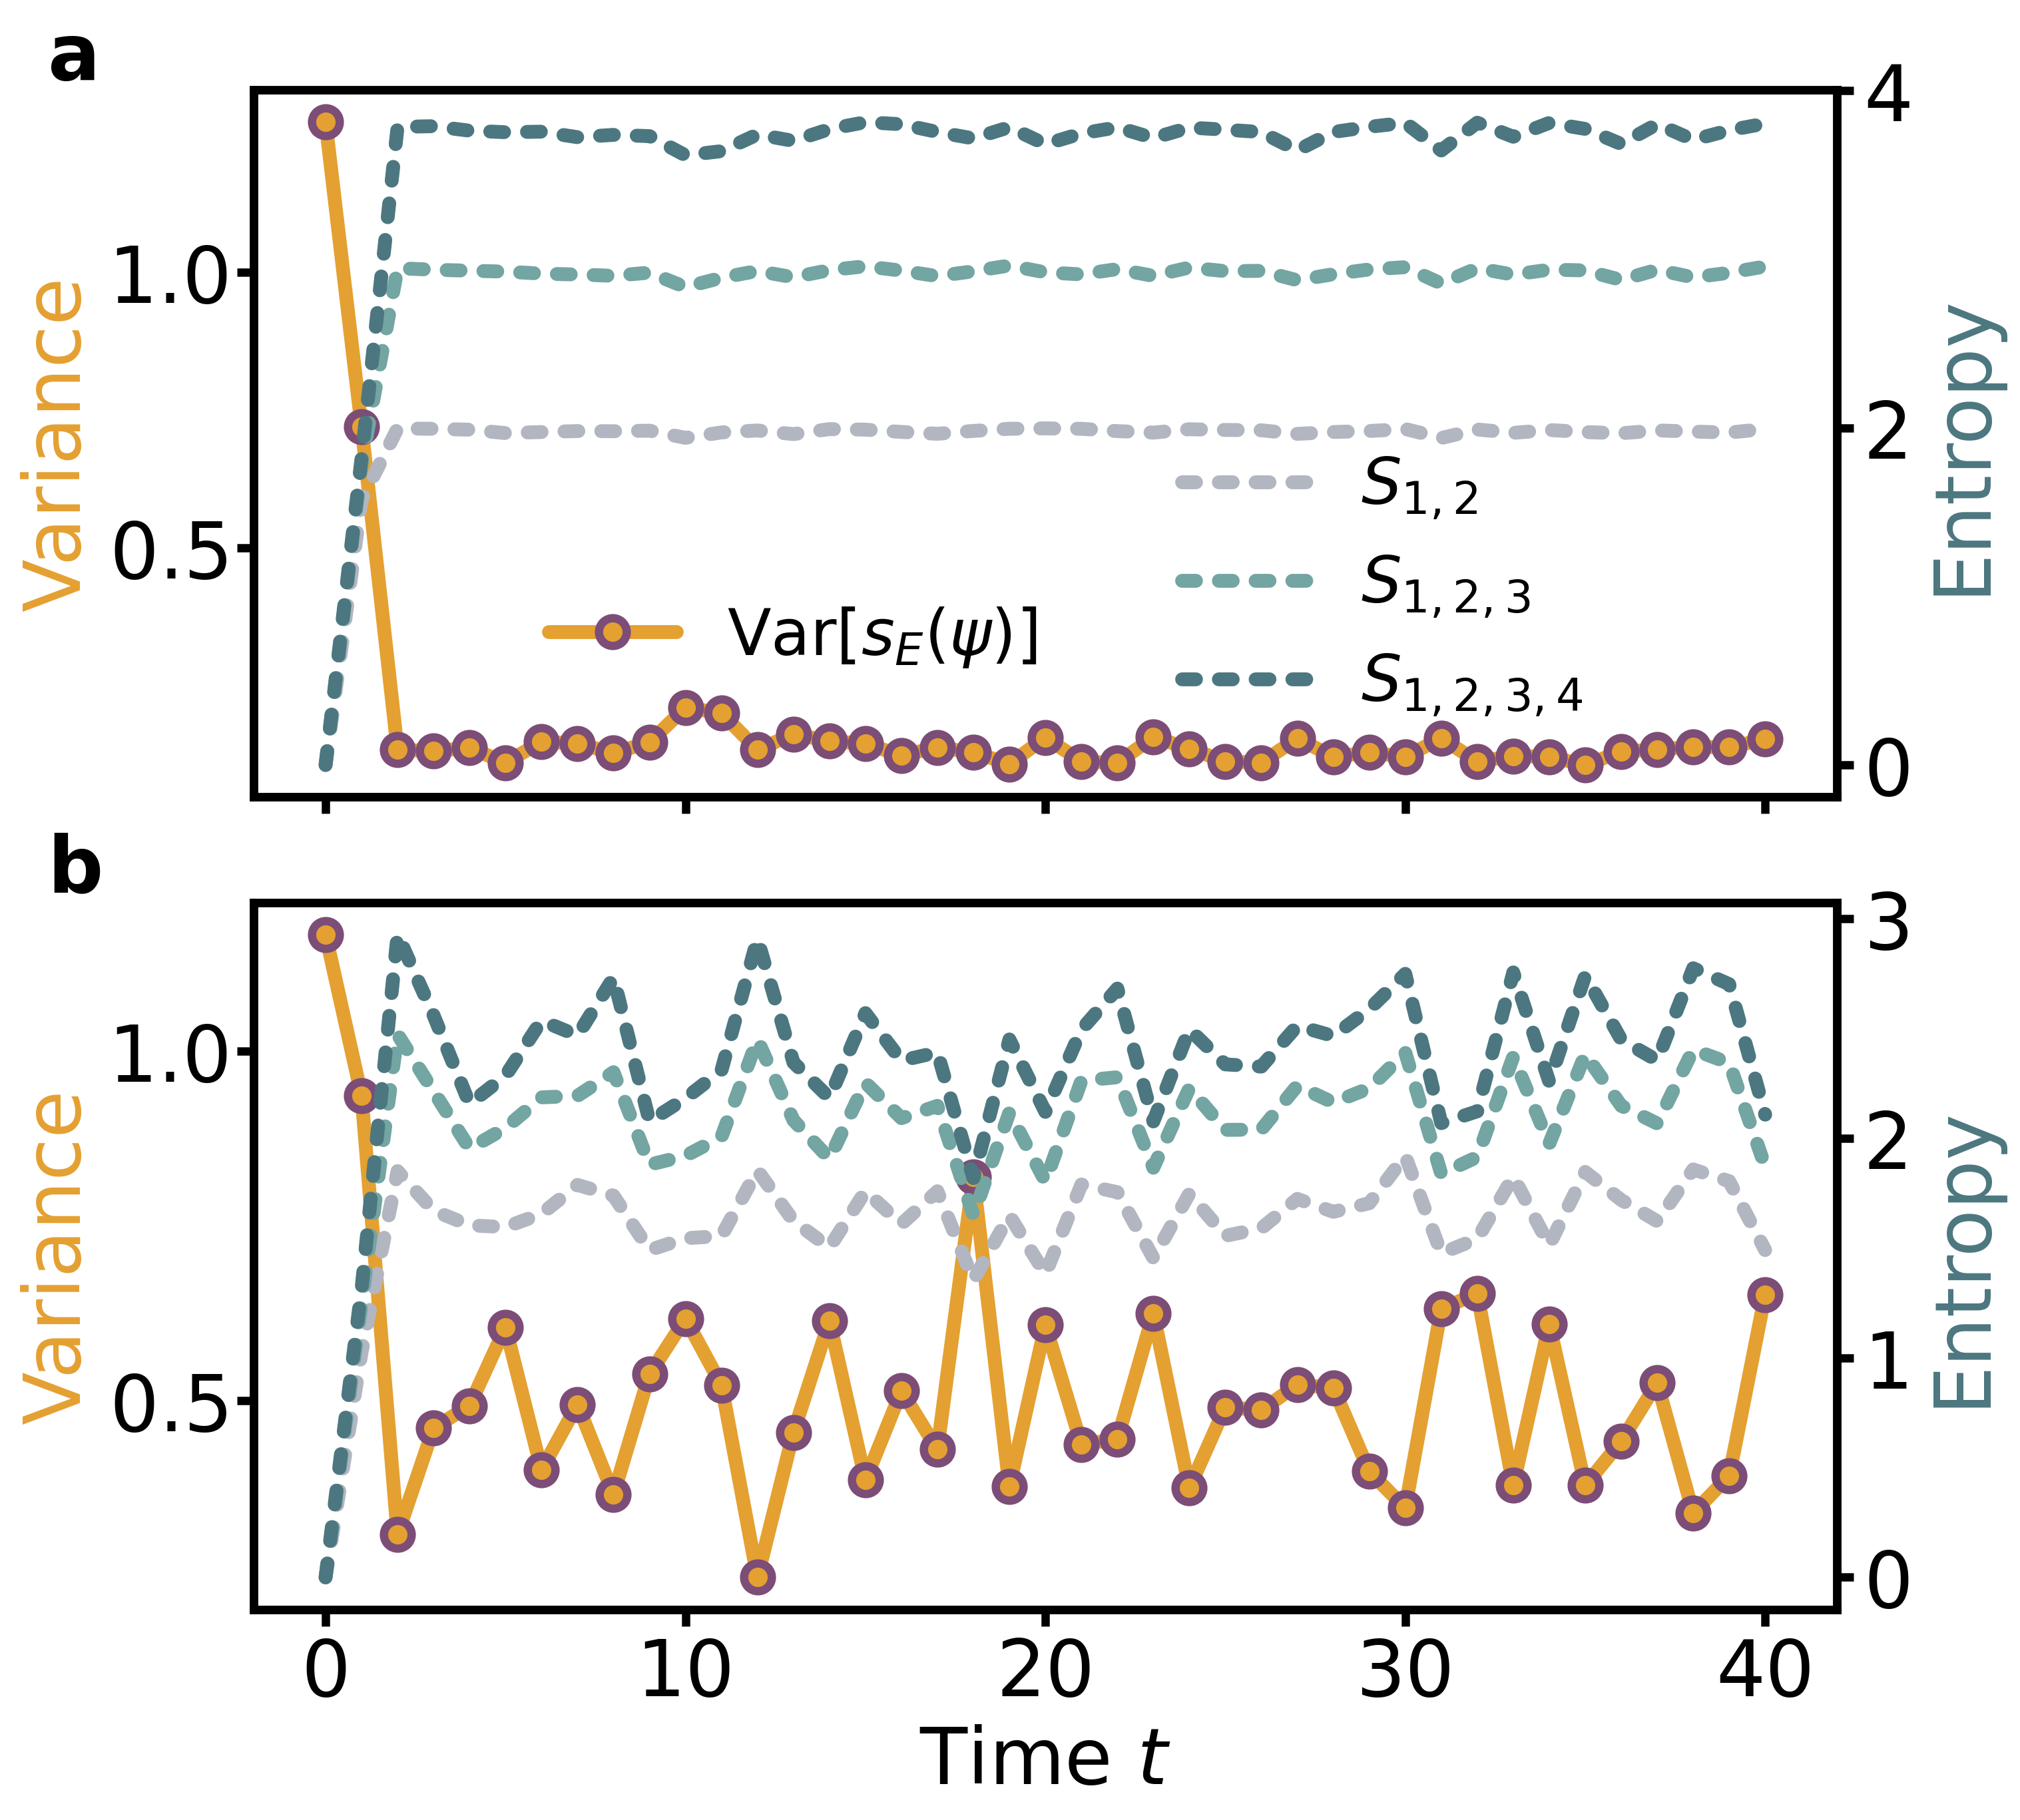

In [3]:
# Create figure with two subplots side by side
fig, (ax1_right, ax1_left) = plt.subplots(2, 1, figsize=(10, 9), layout='constrained',sharex=True)

# ========== LEFT PLOT: ATYPICAL ==========
ax1_left.set_xlabel(r"Time $t$", fontdict=fontprops)
ax1_left.set_ylabel(r"Variance", fontdict=fontprops, color=colors[0])
ax1_left.plot(x, moments_anti, label=rf'$\text{{Var}}[s_E(\psi)]$', color=colors[0], 
              marker="o", markerfacecolor=colors[0], markeredgecolor=colors[4], 
              markersize=10, linestyle="-", markeredgewidth=3, linewidth=5)
ax1_left.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2),useMathText=True)
ax1_left.tick_params(axis='y', labelsize=ls, which='both')
ax1_left.tick_params(axis='x', labelsize=ls)
offset_text_left = ax1_left.yaxis.get_offset_text()
offset_text_left.set_fontsize(ls)
# ax1_left.set_title(r"(a) Atypical", fontdict=fontprops, pad=20)

ax2_left = ax1_left.twinx()
ax2_left.set_ylabel(r"Entropy", fontdict=fontprops, color=colors[8])
part = [2, 3, 4]
labels = [rf'$S_{{1,2}}$', rf'$S_{{1,2,3}}$', rf'$S_{{1,2,3,4}}$']
for j, m in enumerate(part):
    y = np.load(f"./vardata/part{m}atypical.npy")
    ax2_left.plot(x, y, label=labels[j], color=colors[m+4], 
                  linestyle="dotted", linewidth=5)
ax2_left.tick_params(axis='y', which='major', labelsize=ls)

# ========== RIGHT PLOT: TYPICAL ==========
#ax1_right.set_xlabel(r"Time $t$", fontdict=fontprops)
ax1_right.set_ylabel(r"Variance", fontdict=fontprops, color=colors[0])
ax1_right.plot(x, moments_ent, label=rf'$\text{{Var}}[s_E(\psi)]$', color=colors[0], 
               marker="o", markerfacecolor=colors[0], markeredgecolor=colors[4], 
               markersize=10, linestyle="-", markeredgewidth=3, linewidth=5)
ax1_right.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2),useMathText=True)
ax1_right.tick_params(axis='y', labelsize=ls, which='both')
ax1_right.tick_params(axis='x', labelsize=ls)
offset_text_right = ax1_right.yaxis.get_offset_text()
offset_text_right.set_fontsize(ls)
# ax1_right.set_title(r"(b) Typical", fontdict=fontprops, pad=20)

ax2_right = ax1_right.twinx()
# move the ylabel to the top of the axis
ax2_right.set_ylabel(r"Entropy", fontdict=fontprops, color=colors[8])
ax2_left.set_ylabel(r"Entropy", fontdict=fontprops, color=colors[8])
# ax2_right.set_ylabel(r"Entropy", fontdict=fontprops, color=colors[8], rotation=0, ha='left', va='bottom')
# ax2_right.yaxis.set_label_coords(0.75, 1.02) 
# ax2_left.set_ylabel(r"Entropy", fontdict=fontprops, color=colors[8], rotation=0, ha='left', va='bottom')
# ax2_left.yaxis.set_label_coords(0.75, 1.02) 
for j, m in enumerate(part):
    y = np.load(f"./vardata/part{m}typical.npy")
    ax2_right.plot(x, y, label=labels[j], color=colors[m+4], 
                   linestyle="dotted", linewidth=5)
ax2_right.tick_params(axis='y', which='major', labelsize=ls)

# Optional: Add a shared legend
# lines1, labels1 = ax1_left.get_legend_handles_labels()
# lines2, labels2 = ax2_left.get_legend_handles_labels()
# fig.legend(lines1 + lines2, labels1 + labels2, loc='upper center', 
#            bbox_to_anchor=(0.3, 0.56), fontsize=22)
ax1_right.legend(loc='lower left', bbox_to_anchor=(0.15, 0.10), fontsize=23, framealpha=0)
ax2_right.legend(loc='lower left', bbox_to_anchor=(0.55, 0.03), fontsize=23, framealpha=0)
# fig.legend(lines1 + lines2, labels1 + labels2, loc='upper center', 
#            bbox_to_anchor=(0.5, 1.02), ncol=4, fontsize=24)

for ax, label in zip([ax1_right, ax1_left], ['a', 'b']): 
    ax.text(-0.13,1.1, label, transform=ax.transAxes, fontsize=28, va='top', weight='bold')

plt.savefig('en_combined.pdf', bbox_inches='tight', dpi=200, pad_inches=0.1, transparent=True)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

8.10255162933687
8.101775439881505
8.103112868612245
8.102790102983231
8.103292752086253
8.102735326645893
8.10342906104573
8.100185852683296
8.104713444628056
8.10359230129306


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

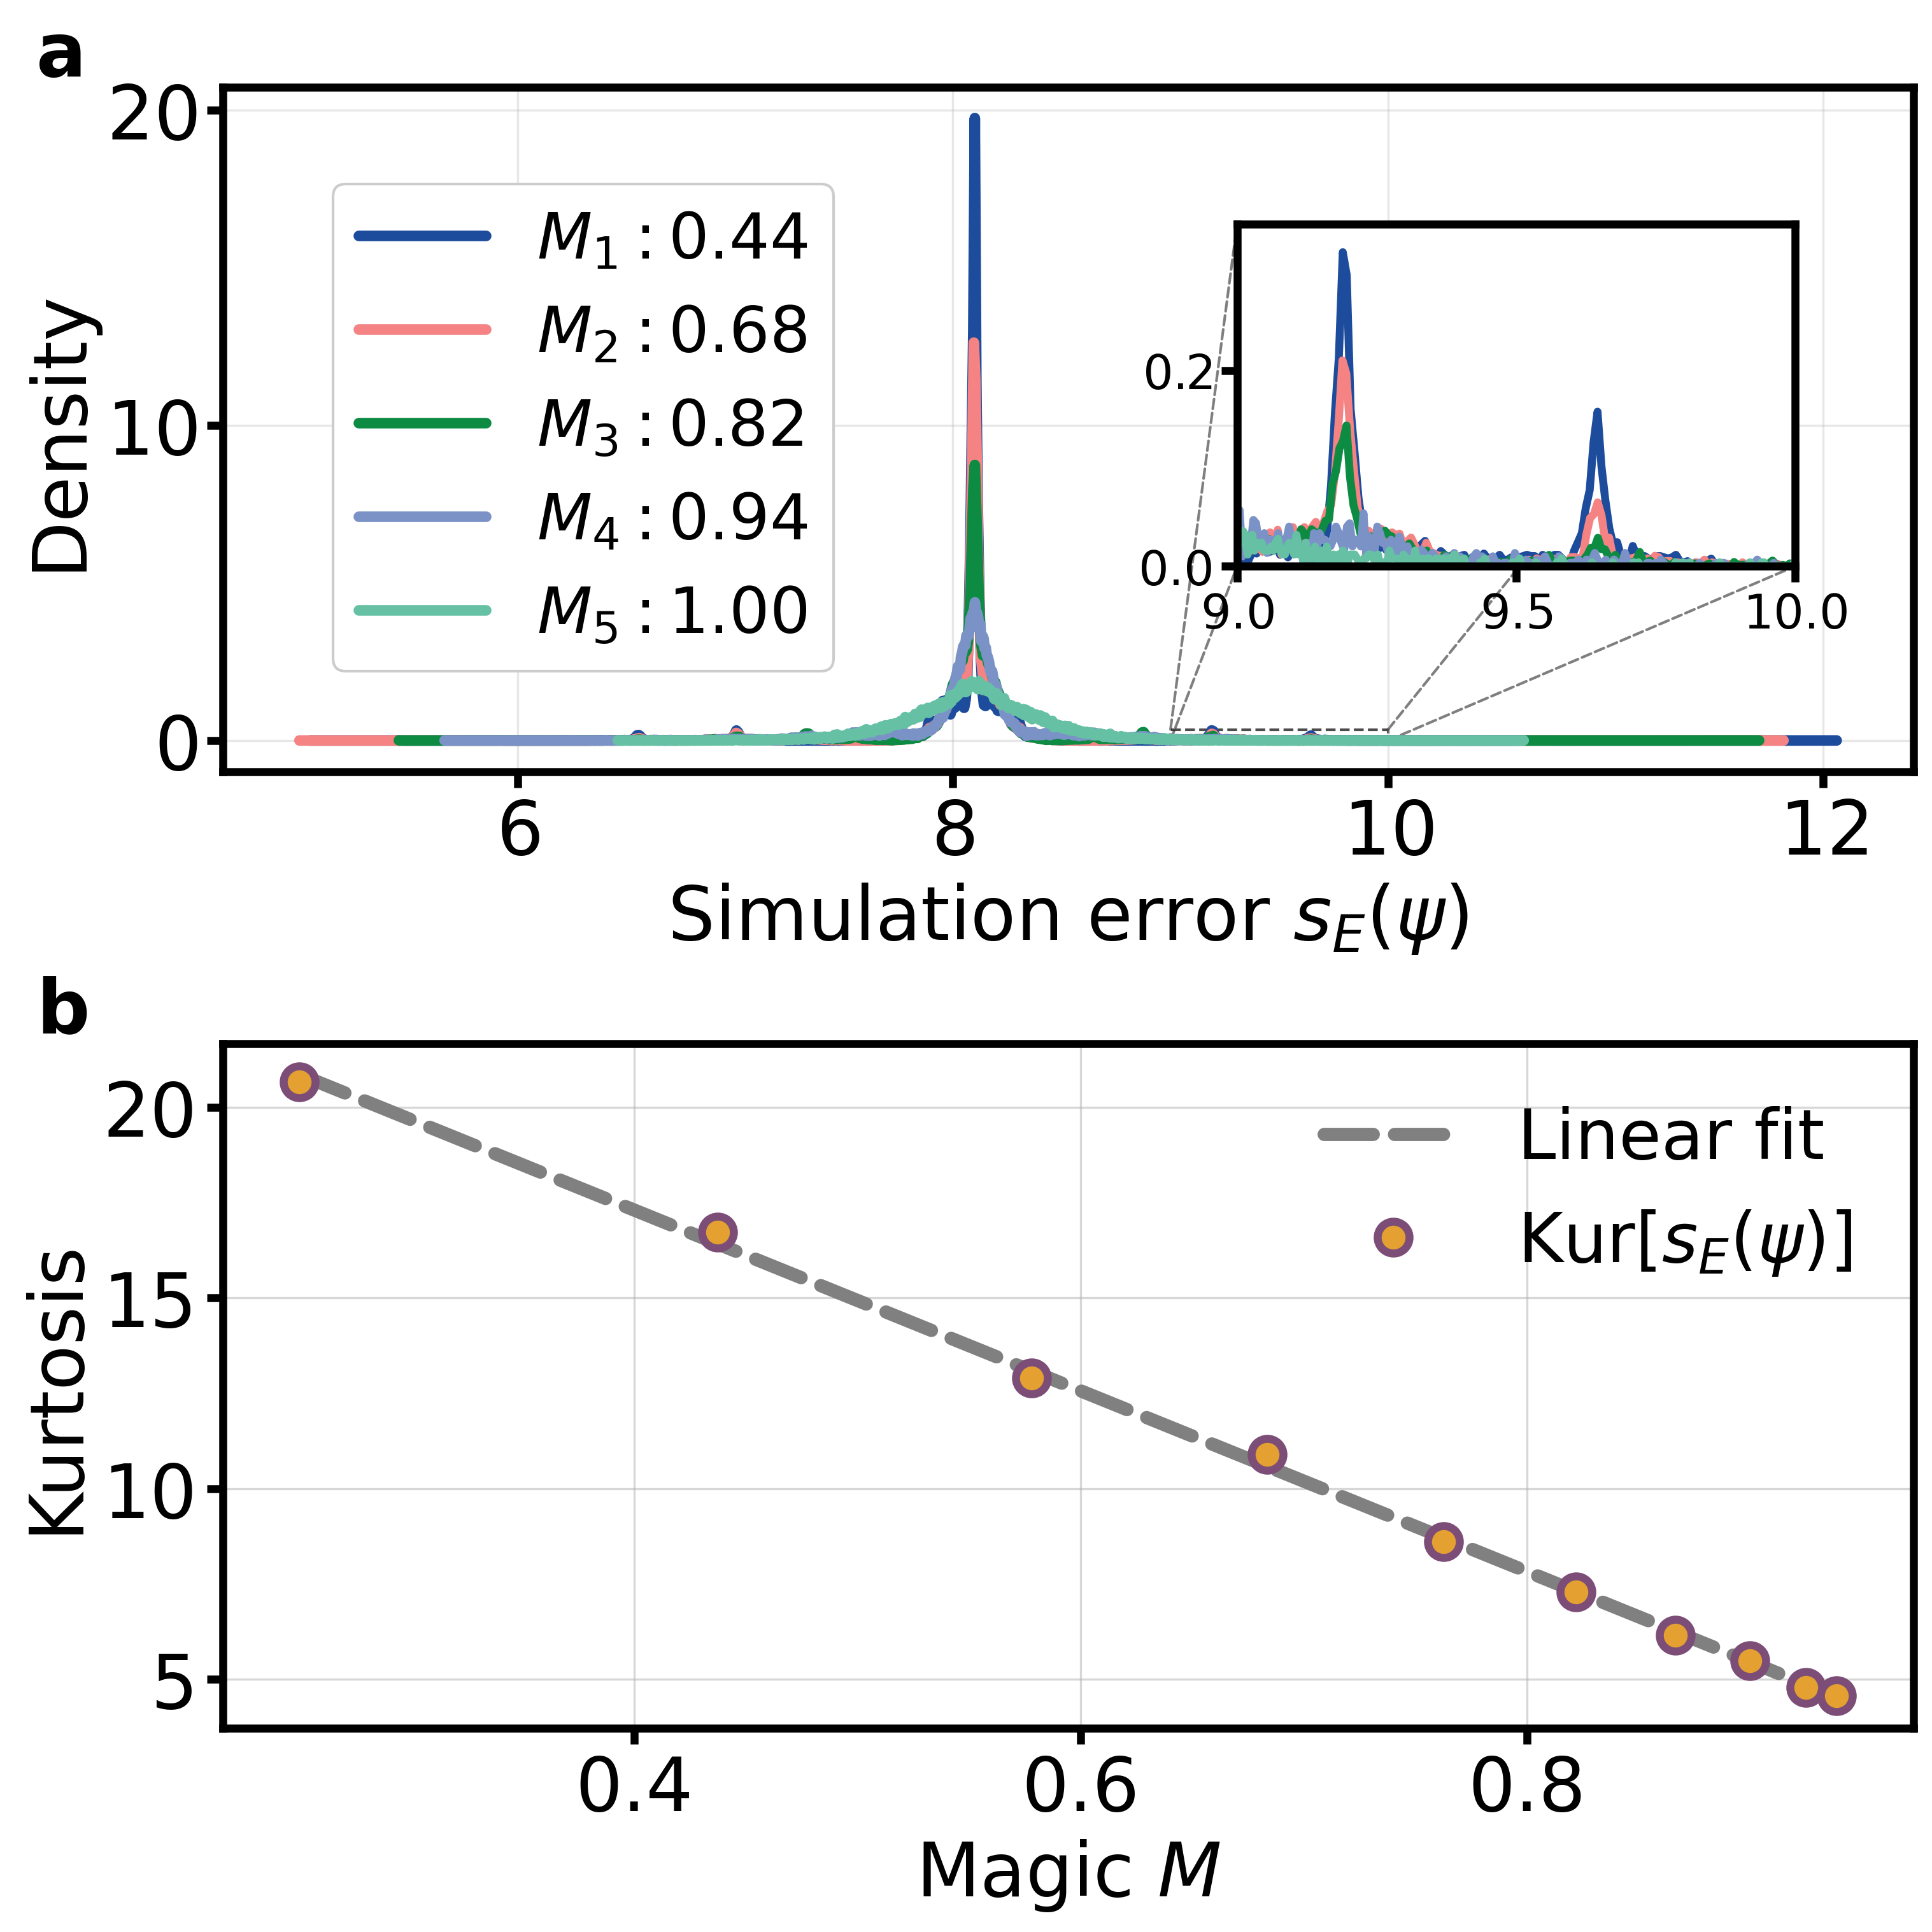

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, ConnectionPatch
from scipy.interpolate import make_interp_spline

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
# plt.rcParams["font.family"] = ["Times New Roman"]
ls = 28
fontprops = {'size': 28}
colors = ['#1E4C9C', '#F58383', '#0D8B43', '#ECAC27', '#7B92C7', '#FB8C62', '#B0DC66', '#8C9FCA', '#C9C780', '#66C1A4', '#FCB2AF', '#9BDFDF', '#FFE2CE', '#C4D8E9', '#BEBCDF', '#4C9BE6', '#B2B6C1', '#4C7780', '#73A5A2', '#F6E2C1', '#F3DBC1', '#D6E2E2', '#F0EFED', '#E3BBED', '#26445E']


# Load data for distributions plot
magics_dist = np.load("./data/differentmagic.npy")

# Load data for kurtosis plot (different file!)
magics_kurt = np.load("./data/differentmagics_right.npy")

# Calculate moments for kurtosis plot - EXACTLY as in kurtosis.py
average = []
moments = []
for j, mag in enumerate(magics_kurt):
    errors = np.load(f"./data/magic_10bit{j+1}.npy")
    errors = np.power(errors, 2)*np.power(10,4)
    av = np.average(errors)
    print(av)
    average.append(av)
    errors = errors - av
    var = np.average(np.power(errors, 2))
    moments.append(np.average(np.power(errors, 4)) / np.power(var, 2))

# Create figure with two subplots side by side
fig, (ax_left, ax_right) = plt.subplots(2, 1, figsize=(10,10), layout='constrained')

# ========== LEFT PLOT: DISTRIBUTIONS ==========
ax_left.set_xlabel(r"Simulation error $s_E(\psi)$", fontdict=fontprops)
ax_left.set_ylabel(r"Density", fontdict=fontprops)
# ax_left.spines['bottom'].set_linewidth(2)

i = 0
for j, m in enumerate(magics_dist):
    if j != 3 and j != 5 and j != 6 and j != 7 and j != 8:
        i = i + 1
        errors = np.load(f"./data/magic_10bit{j+1}.npy")
        errors = np.power(errors, 2)*np.power(10,4)
        hists, bins = np.histogram(errors, 1000,density=True)
        ax_left.plot(bins[:-1], np.power(hists, 1), label=rf"$M_{i}:$""{:.2f}".format(magics_dist[j]), linewidth=4, color=colors[j])

ax_left.legend(fontsize=24, bbox_to_anchor=(0.15, 0.1, 0.23, 0.2), framealpha=1)
ax_left.ticklabel_format(style='sci', scilimits=(-2, 2), axis='y',useMathText=True)
ax_left.ticklabel_format(style='sci', scilimits=(-2, 2), axis='x',useMathText=True)
offset_text_left = ax_left.yaxis.get_offset_text()
offset_text_left.set_fontsize(ls-2)
offset_text_left = ax_left.xaxis.get_offset_text()
offset_text_left.set_fontsize(ls-2)
ax_left.tick_params(axis='both', labelsize=ls)
ax_left.grid(alpha=0.3)

# Add inset for zoomed region
zoom_x_min, zoom_x_max = 9, 10
zoom_y_min, zoom_y_max = 0, .35
ax_inset = ax_left.inset_axes([0.6, 0.3, 0.33, 0.5])

inls=18
i = 1
for j, m in enumerate(magics_dist):
    if j != 3 and j != 5 and j != 6 and j != 7 and j != 8:
        errors = np.load(f"./data/magic_10bit{j+1}.npy")
        errors = np.power(errors, 2)*np.power(10,4)
        hists, bins = np.histogram(errors, 1000, density=True)
        ax_inset.plot(bins[:-1], np.power(hists, 1), label=rf'$M_{i}$={round(magics_dist[j], 3)}', linewidth=3, color=colors[j])
        ax_inset.set_xlim(zoom_x_min, zoom_x_max)
        ax_inset.set_ylim(zoom_y_min, zoom_y_max)
ax_inset.tick_params(axis='both', labelsize=inls)
ax_inset.ticklabel_format(style='sci', scilimits=(-2, 2), axis='y',useMathText=True)
ax_inset.ticklabel_format(style='sci', scilimits=(-2, 2), axis='x',useMathText=True)
offset_text_inset_y = ax_inset.yaxis.get_offset_text()
offset_text_inset_y.set_fontsize(inls)
offset_text_inset_x = ax_inset.xaxis.get_offset_text()
offset_text_inset_x.set_fontsize(inls)

# Mark zoomed region on main plot
rect = Rectangle(
    (zoom_x_min, zoom_y_min),
    zoom_x_max - zoom_x_min,
    zoom_y_max - zoom_y_min,
    linewidth=1,
    edgecolor='black',
    facecolor='none',
    linestyle='--',
    alpha=0.7
)
ax_left.add_patch(rect)

# Connection lines
al = 0.5
con1 = ConnectionPatch(xyA=(zoom_x_min, zoom_y_min), xyB=(zoom_x_min, zoom_y_min), 
                       coordsA="data", coordsB="data", axesA=ax_left, axesB=ax_inset,
                       color="black", linestyle="--", alpha=al, linewidth=1)
con2 = ConnectionPatch(xyA=(zoom_x_max, zoom_y_min), xyB=(zoom_x_max, zoom_y_min),
                       coordsA="data", coordsB="data", axesA=ax_left, axesB=ax_inset,
                       color="black", linestyle="--", alpha=al, linewidth=1)
con3 = ConnectionPatch(xyA=(zoom_x_min, zoom_y_max), xyB=(zoom_x_min, zoom_y_max),
                       coordsA="data", coordsB="data", axesA=ax_left, axesB=ax_inset,
                       color="black", linestyle="--", alpha=al, linewidth=1)
con4 = ConnectionPatch(xyA=(zoom_x_max, zoom_y_max), xyB=(zoom_x_max, zoom_y_max),
                       coordsA="data", coordsB="data", axesA=ax_left, axesB=ax_inset,
                       color="black", linestyle="--", alpha=al, linewidth=1)

ax_left.add_artist(con1)
ax_left.add_artist(con2)
ax_left.add_artist(con3)
ax_left.add_artist(con4)

# ========== RIGHT PLOT: KURTOSIS ==========
colors_right = ['#E4A031', '#D68438', '#C76B60', '#B55384', '#7C4D77', '#474769', '#B2B6C1', '#4C7780', '#73A5A2', '#F6E2C1', '#F3DBC1', '#D6E2E2', '#F0EFED', '#E3BBED', '#26445E']

# Fit and plot - EXACTLY as in kurtosis.py
z1 = np.polyfit(magics_kurt, moments, 1)
p1 = np.poly1d(z1)
moments_pre = p1(magics_kurt)
ax_right.plot(magics_kurt, moments_pre, "--", color='gray', linewidth=5, label='Linear fit')


ax_right.set_xlabel(r"Magic $M$", fontdict=fontprops)
ax_right.set_ylabel(r"Kurtosis", fontdict=fontprops)
ax_right.tick_params(axis='both', labelsize=ls)
ax_right.grid(True, alpha=0.5)

# Plot points - EXACTLY as in kurtosis.py
ax_right.plot(magics_kurt, moments, "o", markerfacecolor=colors_right[0], 
              markeredgecolor=colors_right[4], markersize=12, markeredgewidth=3,label=r'Kur[$s_E(\psi)$]')
ax_right.legend(loc='best', fontsize=26, framealpha=0)
# Add labels (a) and (b)
for ax, label in zip([ax_left, ax_right], ['a', 'b']):
    ax.text(-0.11, 1.1, label, transform=ax.transAxes, fontsize=28, va='top', weight='bold')

plt.savefig('combined_distributions_kurtosis.pdf', bbox_inches='tight', pad_inches=0.1,dpi=200,transparent=True)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

Finished!


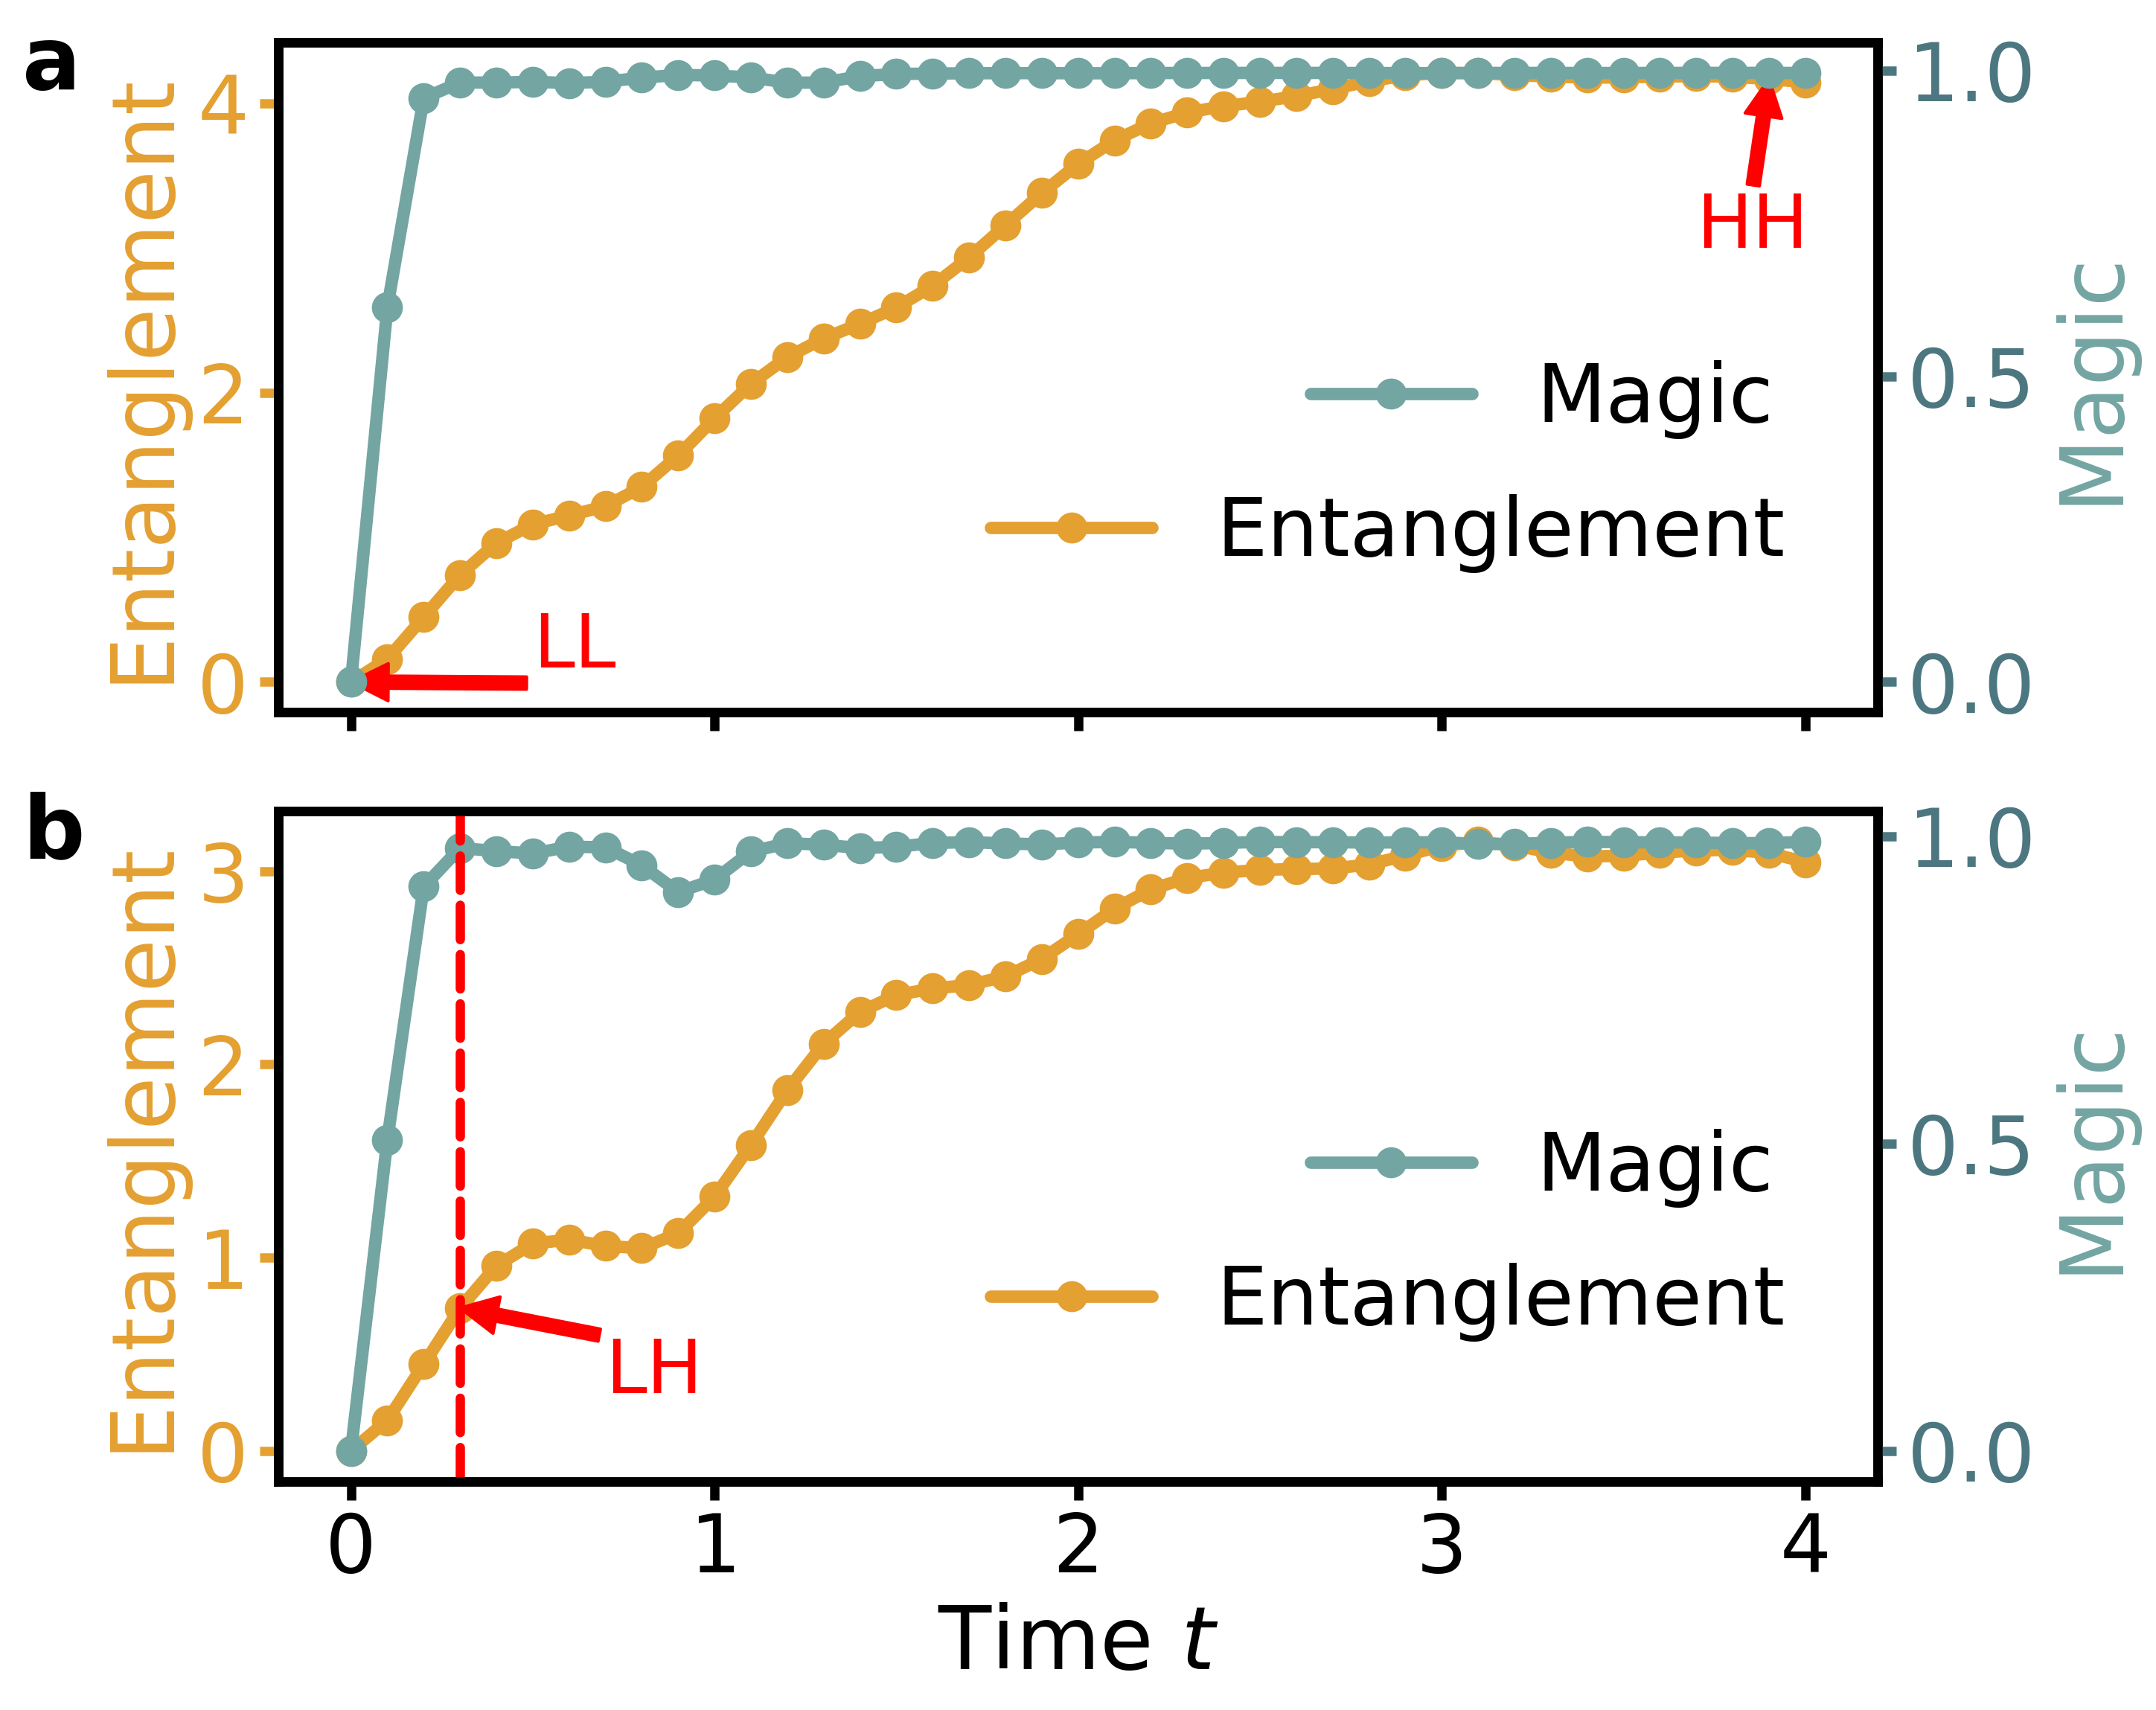

In [5]:
def partEntropy(state, m):
    st = partial_trace(state, list(range(m)))
    return entropy(st,2)

colors = ['#E4A031', '#D68438', '#C76B60', '#B55384', '#7C4D77', '#474769', 
          '#B2B6C1', '#73A5A2', '#4C7780', '#F6E2C1', '#F3DBC1', '#D6E2E2', 
          '#F0EFED', '#E3BBED', '#26445E']

n=10
times=np.linspace(0,4,41)
mas=np.load("./mag_time_data/Tymagics.npy")
amas=np.load("./mag_time_data/Atymagics.npy")
magics=[]
amagics=[]
i=0
while i<41:
    magics.append(mas[i])
    amagics.append(amas[i])
    i+=1
entropies=np.load("./mag_time_data/Tyentropies.npy")
aentropies=np.load("./mag_time_data/Atyentropies.npy")
fontprops = {'size': 28} #axis
ls=26 #legend size
ts=26 #tick size
ms=10 #marks size
mes=0 #marks edge size
lw=4  #linewidth
As=24 #annotation size

#=======Create two subplots========
fig, (ax_up,ax_down) = plt.subplots(2,1,figsize=(10,8),sharex=True)

#typical case
e=0
#ax_up.set_xlabel(r"Time $t$",fontdict=fontprops)
ax_up.set_ylabel(r"Entanglement", fontdict=fontprops, color=colors[e])
ax_up.plot(times,entropies,label="Entanglement",color=colors[e], marker="o", markerfacecolor=colors[e], markeredgecolor=colors[5], markersize=ms, linestyle="-", markeredgewidth=mes, linewidth=lw)
ax_up.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2))
ax_up.tick_params(axis='y', labelsize=ts, colors=colors[e])
ax_up.tick_params(axis='x', labelsize=ts)

ax2=ax_up.twinx()
m=7
ax2.set_ylabel(r"Magic", fontdict=fontprops, color=colors[m])
ax2.tick_params(axis='y', labelsize=ts,colors=colors[m+1])
ax2.plot(times,magics,label="Magic",color=colors[m], marker="o", markerfacecolor=colors[m], markeredgecolor=colors[m+1], markersize=ms, linestyle="-", markeredgewidth=mes, linewidth=lw)

ax_up.legend(loc='lower left', bbox_to_anchor=(0.4, 0.10), fontsize=ls, framealpha=0)
ax2.legend(loc='lower left', bbox_to_anchor=(0.6, 0.30), fontsize=ls, framealpha=0)
#ax_up.set_title(r"(b) Typical", fontsize=ls, pad=20)
ax_up.annotate('LL', xy=(0, 0), xytext=(.5,.1), xycoords='data', fontsize=As, color='red', weight='normal',arrowprops=dict( color='red',shrink=0))
ax_up.annotate('HH', xy=(3.9, entropies[39]), xytext=(3.7,3), xycoords='data', fontsize=As, color='red', weight='normal',arrowprops=dict( color='red',shrink=1))

#Atypical case
e=0
ax_down.set_xlabel(r"Time $t$",fontdict=fontprops)
ax_down.set_ylabel(r"Entanglement", fontdict=fontprops, color=colors[e])
ax_down.plot(times,aentropies,label="Entanglement",color=colors[e], marker="o", markerfacecolor=colors[e], markeredgecolor=colors[5], markersize=ms, linestyle="-", markeredgewidth=mes, linewidth=lw)
ax_down.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2))
ax_down.tick_params(axis='y', labelsize=ts, colors=colors[e])
ax_down.tick_params(axis='x', labelsize=ts)

ax4=ax_down.twinx()
m=7
ax4.set_ylabel(r"Magic", fontdict=fontprops, color=colors[m])
ax4.tick_params(axis='y', labelsize=ts,colors=colors[m+1])
ax4.plot(times,amagics,label="Magic",color=colors[m], marker="o", markerfacecolor=colors[m], markeredgecolor=colors[m+1], markersize=ms, linestyle="-", markeredgewidth=mes, linewidth=lw)

ax_down.legend(loc='lower left', bbox_to_anchor=(0.4, 0.10), fontsize=ls, framealpha=0)
ax4.legend(loc='lower left', bbox_to_anchor=(0.6, 0.30), fontsize=ls, framealpha=0)
ax4.axvline(x=.3, color='red', linestyle='--', linewidth=3)

# Add labels (a) and (b)
for ax, label in zip([ax_up, ax_down], ['a', 'b']):
    ax.text(-.16, 1.03, label, transform=ax.transAxes, fontsize=28, va='top', weight='bold')
ax_down.annotate('LH', xy=(.3, entropies[3]), xytext=(.7,.3), xycoords='data', fontsize=As, color='red', weight='normal',arrowprops=dict( color='red',shrink=1))
piontcolors=['#D2BBD5','#AF76A2','#882E71']

plt.savefig('T_Increase.pdf', 
            bbox_inches='tight',  # 紧贴内容
            pad_inches=0.1,         # 无额外填充
            dpi=1200000,              # 高分辨率
            transparent=True)     # 透明背景
print("Finished!")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

74555 74555 74555


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


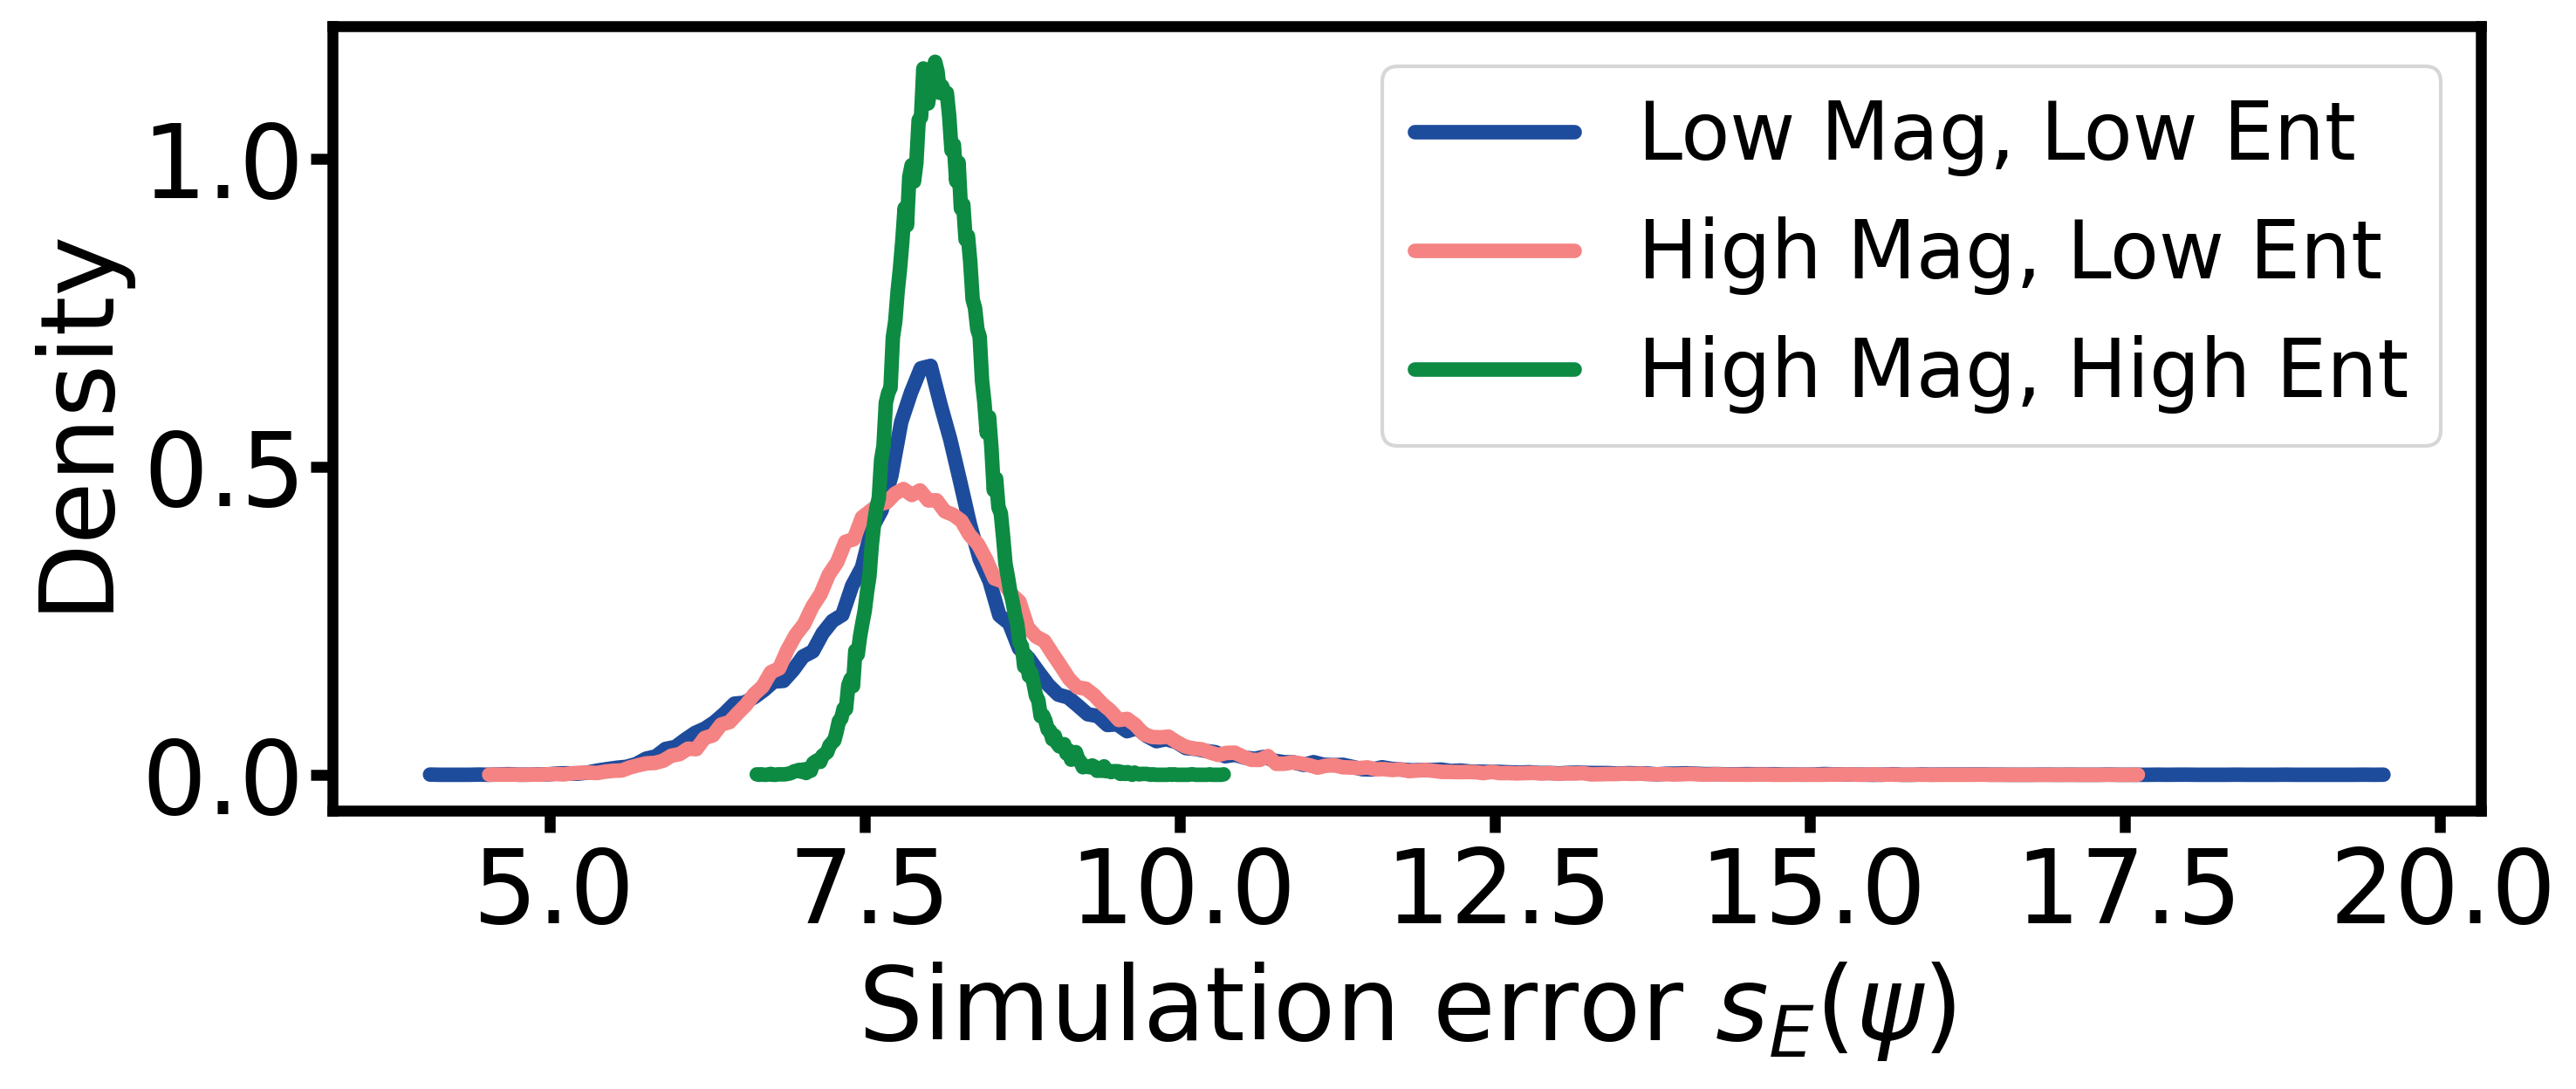

In [7]:
# # Plot three distributions
lowmag_lowent_error=np.load("./newdata/lowmag_lowent_error.npy").tolist()
highmag_lowent_error=np.load("./newdata/highmag_lowent_error.npy").tolist()
highmag_highent_error=np.load("./newdata/highmag_highent_error.npy").tolist()
del lowmag_lowent_error[74554:-1]
del highmag_lowent_error[74554:-1]
del highmag_highent_error[74554:-1]
lowmag_lowent_error=np.power(lowmag_lowent_error,2)
highmag_lowent_error=np.power(highmag_lowent_error,2)
highmag_highent_error=np.power(highmag_highent_error,2)
print(len(lowmag_lowent_error),len(highmag_lowent_error),len(highmag_highent_error))
fig, ax=plt.subplots(figsize=(10,4.5))
ls = 28
les = 22
fontprops = {'size': 28}
labels=['Low Mag, Low Ent','High Mag, Low Ent','High Mag, High Ent']
colors = ['#1E4C9C', '#F58383', '#0D8B43', '#ECAC27', '#7B92C7', '#FB8C62', '#B0DC66', '#8C9FCA', '#C9C780', '#66C1A4', '#FCB2AF', '#9BDFDF', '#FFE2CE', '#C4D8E9', '#BEBCDF', '#4C9BE6', '#B2B6C1', '#4C7780', '#73A5A2', '#F6E2C1', '#F3DBC1', '#D6E2E2', '#F0EFED', '#E3BBED', '#26445E']
for j,error in enumerate([lowmag_lowent_error,highmag_lowent_error,highmag_highent_error]):
    hists, bins = np.histogram(error*np.power(10,4), 200,density=True)
    ax.plot(bins[:-1], np.power(hists, 1), linewidth=4, color=colors[j],label=labels[j])
ax.set_xlabel(r"Simulation error $s_E(\psi)$",fontsize=ls)
ax.set_ylabel("Density",fontsize=ls)
ax.tick_params(axis='both', which='major', labelsize=ls)
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,2), useMathText=True)
ax.legend(loc='best',fontsize=les)
plt.savefig('3distributions.pdf', bbox_inches='tight', pad_inches=0.1,dpi=200,transparent=True)